In [ ]:
import pandas as pd
import numpy as np
import io
from google.colab import files

#data uploaded
uploaded = files.upload()
data = pd.read_csv('Creditcard_data.csv')

Saving Creditcard_data.csv to Creditcard_data (7).csv


In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data['Class'].value_counts()

0    763
1      9
Name: Class, dtype: int64

<Axes: title={'center': 'Class Distribution'}, xlabel='Class', ylabel='Count'>

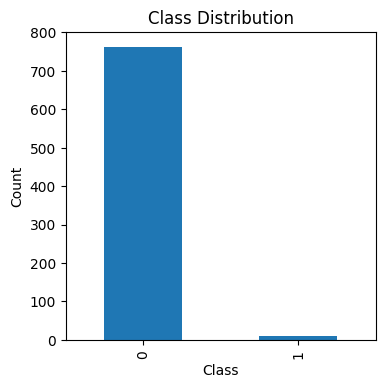

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
data['Class'].value_counts().plot(kind='bar')

In [ ]:
X=data.drop(columns={'Class'},axis=1)
y=data['Class']

In [ ]:
# Oversampling technique to balance the dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

In [ ]:
df = pd.DataFrame(X_sm)
df['Class'] = y_sm

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,539,-1.663990,0.060507,1.165146,-0.623112,0.888797,-0.311099,0.264731,0.131895,0.023240,...,-0.182217,-0.207685,-0.252182,-0.223022,-0.321195,0.236690,-0.337090,-0.373244,1.007220,1
1522,143,0.594725,0.462466,0.385976,0.370038,0.295982,-0.331656,0.203873,-0.011537,-0.053252,...,-0.198834,-0.580798,0.140896,-0.612448,-0.680960,0.083923,0.119200,0.142251,1.740022,1
1523,476,-2.253111,-1.828809,1.332330,1.501757,1.212806,-1.003612,0.532365,-0.100972,-0.222814,...,0.439249,0.377899,0.765454,-0.040028,0.321392,-0.260628,-0.197352,-0.024591,331.715033,1
1524,159,0.226331,-0.569087,0.862301,0.657414,0.786484,0.122279,-0.693180,0.297793,0.111812,...,-0.029723,-0.083972,0.160733,-0.496288,0.050278,0.348228,-0.043957,-0.041465,2.330093,1


In [ ]:
df['Class'].value_counts()

0    763
1    763
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)
print('Training Accuracy:',metrics.accuracy_score(y_train,model.predict(X_train))*100)
print('Testing Accuracy:',metrics.accuracy_score(y_test,model.predict(X_test))*100)

Training Accuracy: 100.0
Testing Accuracy: 100.0


In [ ]:
import math as m
# Simple Random Sampling
z = 1.96
p = 0.5
E = 0.05
sample_size = m.ceil((z**2*p*(1-p))/(E**2))

samples=[]
s1 = df.sample(n=sample_size,random_state=0)
samples.append(s1)
s1['Class'].value_counts()

0    200
1    185
Name: Class, dtype: int64

In [ ]:
# Systematic Sampling
n=len(df)
k=int(m.sqrt(n))
s2=df.iloc[::k]
samples.append(s2)
s2['Class'].value_counts()

0    20
1    20
Name: Class, dtype: int64

In [ ]:
# Cluster sampling
z=1.96
p=0.5
E=0.05
C=1.5
sample_size=round((z**2*p*(1-p))/((E/C)**2))
clusters=2
df_new=df
N = len(df)
K = int(N/sample_size)
data = None
for k in range(K):
    sample_k = df_new.sample(sample_size)
    sample_k["cluster"] = np.repeat(k,len(sample_k))
    df_new = df_new.drop(index = sample_k.index)
    data = pd.concat([data,sample_k],axis = 0)

random_chosen_clusters = np.random.randint(0,K,size = clusters)
s3 = data[data.cluster.isin(random_chosen_clusters)]
s3.drop(['cluster'], axis=1, inplace=True)
samples.append(s3)
s3['Class'].value_counts()

0    433
1    431
Name: Class, dtype: int64

In [ ]:
# Stratefied Sampling
z=1.96
p=0.5
E=0.05
S=0.7
sample_size=round((z**2*p*(1-p))/((E/S)**2))
s4=df.groupby('Class', group_keys=False).apply(lambda x: x.sample(sample_size))
samples.append(s4)
s4['Class'].value_counts()

0    188
1    188
Name: Class, dtype: int64

In [ ]:
# Convenience Sampling
s5=df.head(350)
samples.append(s5)
s5['Class'].value_counts()

0    347
1      3
Name: Class, dtype: int64

In [ ]:
from scipy.stats import shapiro
# Check goodness of each sample using Shapiro-Wilk test
for i in range(5):
  print(shapiro(samples[i]))

ShapiroResult(statistic=0.1763916015625, pvalue=0.0)
ShapiroResult(statistic=0.1672074794769287, pvalue=0.0)
ShapiroResult(statistic=0.17680621147155762, pvalue=0.0)
ShapiroResult(statistic=0.17516827583312988, pvalue=0.0)
ShapiroResult(statistic=0.09570705890655518, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
heading=['Simple-Random','Systematic','Cluster','Stratified','Convenience']
ans=pd.DataFrame(columns=heading, index=['SVM','Logistic Regression','Decision Tree','Random Forest','Naive Bayes'])

In [ ]:
# Applying Models

for i in range(5):
  j=0
  x_s=samples[i].drop('Class',axis=1)
  y_s=samples[i]['Class']
  xtrain, xtest, y_train, y_test = train_test_split(x_s ,y_s , random_state=104,test_size=0.25, shuffle=True)

  # Applying SVM

  clf = SVC(kernel='rbf')
  clf.fit(xtrain, y_train)
  y_pred=clf.predict(xtest)
  acc = accuracy_score(y_test, y_pred)
  ans.iloc[j,i]=acc*100

  # Applying Logistic Regression

  classifier = LogisticRegression(random_state = 0,max_iter=2000)
  classifier.fit(xtrain, y_train)
  y_pred = classifier.predict(xtest)
  acc = accuracy_score(y_test, y_pred)
  ans.iloc[j+1,i]=acc*100

  # Applying Decision Tree
  classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  classifier.fit(xtrain, y_train)
  y_pred = classifier.predict(xtest)
  acc = accuracy_score(y_test, y_pred)
  ans.iloc[j+2,i]=acc*100

  # Applying RandomForest Classifier
  clf = RandomForestClassifier(n_estimators = 100)
  clf.fit(xtrain, y_train)
  y_pred = clf.predict(xtest)
  acc = accuracy_score(y_test, y_pred)
  ans.iloc[j+3,i]=acc*100

  # Applying Naive bayes

  model = GaussianNB()
  model.fit(xtrain,y_train)
  predicted= model.predict(xtest)
  acc = accuracy_score(y_test, y_pred)
  ans.iloc[j+4,i]=acc*100

print(ans)

                    Simple-Random Systematic    Cluster Stratified Convenience
SVM                     74.226804       50.0  72.685185  70.212766   97.727273
Logistic Regression     88.659794       80.0   92.12963  91.489362   97.727273
Decision Tree           91.752577       80.0  96.296296   98.93617   95.454545
Random Forest               100.0       80.0  99.074074  96.808511   97.727273
Naive Bayes                 100.0       80.0  99.074074  96.808511   97.727273


In [ ]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: red' if v else '' for v in is_max]
ans.style.apply(highlight_max, axis=1)

,Simple-Random,Systematic,Cluster,Stratified,Convenience
SVM,74.226804,50.000000,72.685185,70.212766,97.727273
Logistic Regression,88.659794,80.000000,92.129630,91.489362,97.727273
Decision Tree,91.752577,80.000000,96.296296,98.936170,95.454545
Random Forest,100.000000,80.000000,99.074074,96.808511,97.727273
Naive Bayes,100.000000,80.000000,99.074074,96.808511,97.727273
